In [31]:
%pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definindo as variáveis de entrada e saída
distancia = ctrl.Antecedent(np.arange(0, 11, 1), 'distancia')
angulo = ctrl.Antecedent(np.arange(-45, 46, 1), 'angulo')
potencia = ctrl.Consequent(np.arange(0, 26, 1), 'potencia', 'centroid')

# Definindo as funções de pertinência
distancia['muito_longe'] = fuzz.gaussmf(distancia.universe, 0, 1.3)
distancia['longe'] = fuzz.gaussmf(distancia.universe, 3, 1.3)
distancia['medio'] = fuzz.gaussmf(distancia.universe, 5, 1.3)
distancia['perto'] = fuzz.gaussmf(distancia.universe, 8, 1.3)
distancia['muito_perto'] = fuzz.gaussmf(distancia.universe, 10, 1.3)

angulo['muito_negativo'] = fuzz.trapmf(angulo.universe, [-45, -45, -30, -15])
angulo['negativo'] = fuzz.trapmf(angulo.universe, [-30, -15, -5, 0])
angulo['zero'] = fuzz.trapmf(angulo.universe, [0, 0, 0, 0])
angulo['positivo'] = fuzz.trapmf(angulo.universe, [0, 5, 15, 30])
angulo['muito_positivo'] = fuzz.trapmf(angulo.universe, [15, 30, 45, 45])

potencia['baixa'] = fuzz.trimf(potencia.universe, [18.75, 25, 25]) 
potencia['media'] = fuzz.trimf(potencia.universe, [6.25, 12.5, 18.75])
potencia['alta'] = fuzz.trimf(potencia.universe, [0, 0, 6.25])

# Definindo as regras do sistema de controle fuzzy
rule1 = ctrl.Rule(distancia['longe'] | angulo['negativo'], potencia['alta'])
rule2 = ctrl.Rule(distancia['medio'], potencia['media'])
rule3 = ctrl.Rule(distancia['perto'] | angulo['positivo'], potencia['baixa'])
rule4 = ctrl.Rule(distancia['muito_perto'] | angulo['zero'], potencia['baixa'])


# Criando o sistema de controle fuzzy
potencia_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Simulando o sistema com as entradas dadas (distância = 3, ângulo = 30)
potencia_simulada = ctrl.ControlSystemSimulation(potencia_ctrl)
potencia_simulada.input['distancia'] = 2
potencia_simulada.input['angulo'] = -45
potencia_simulada.compute()

# Defuzzificando a saída pelo método do centroide
potencia_simulada.output['potencia']


4.554233173304513

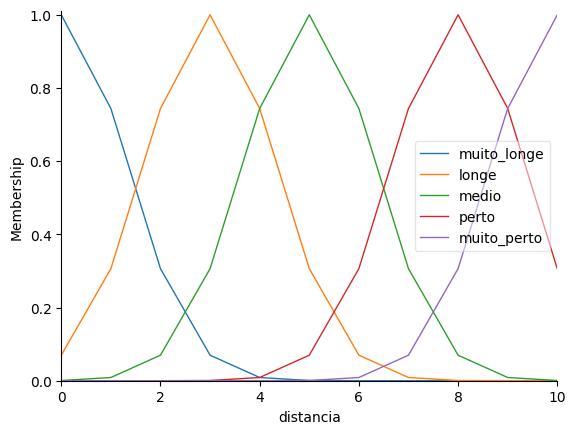

In [33]:
distancia.view()

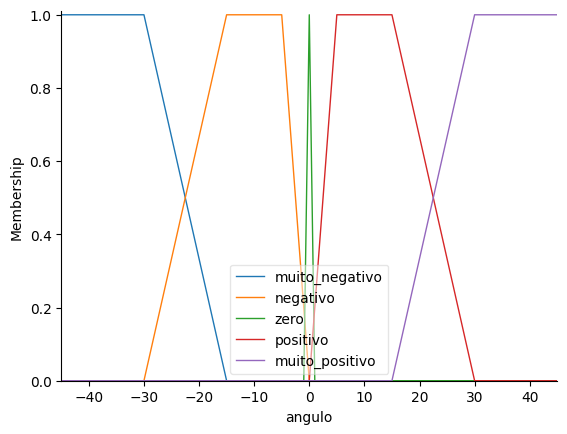

In [34]:
angulo.view()

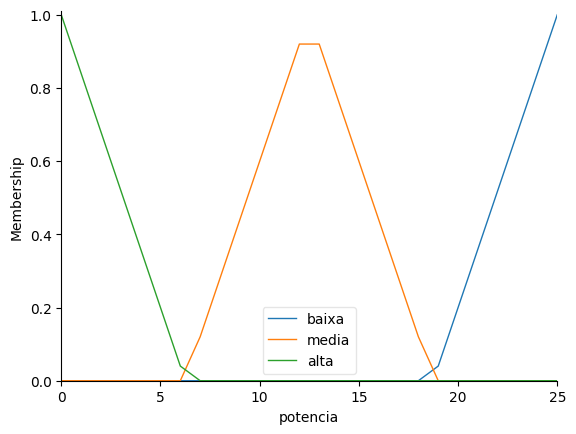

In [35]:
potencia.view()

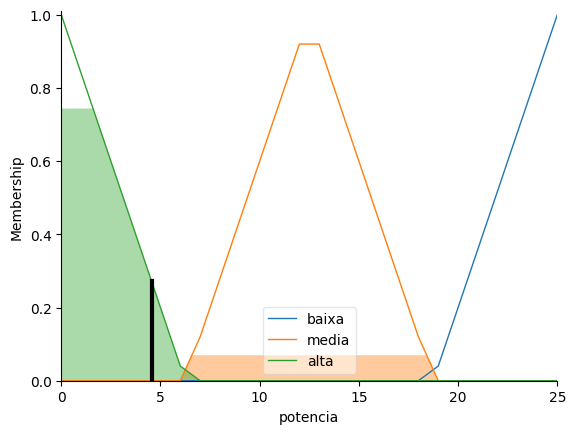

In [36]:
potencia.view(sim=potencia_simulada)